# Домашнее задание

- Скачайте текст войны и мир (ссылка на [github](https://github.com/netology-code/ds3-spring-2018/tree/master/7.%20Time_series/7.4/war_and_peace) и [гугл диск](https://drive.google.com/drive/u/2/folders/1aM7cNI6Qs7AyeYpQ8lNg7vLsHzIl0JbU)). Очистите его, оставив только русские буквы и символы пробела. Постройте матрицу переходных вероятностей. Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р; Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов
- Выберите ряд из предыдущих домашних заданий по временным рядам и оцените его через HMM. Попробуйте “построить” (через среднее каждой компоненты) наивный прогноз ряда.

In [248]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

In [249]:
with open('war_and_peace/tom_1.txt', 'r', encoding="utf-8") as f_1, \
    open('war_and_peace/tom_2.txt', 'r', encoding="utf-8") as f_2, \
    open('war_and_peace/tom_3.txt', 'r', encoding="utf-8") as f_3, \
    open('war_and_peace/tom_4.txt', 'r', encoding="utf-8") as f_4:
    text = f_1.read().lower() + f_2.read().lower() + f_3.read().lower() + f_4.read().lower()

In [250]:
text = re.sub('[^ а-яё\n]', '', text)

In [251]:
text = re.sub('\n', ' ', text)

In [252]:
text = re.sub('\s+', ' ', text)

In [253]:
# text

In [254]:
RUSSIAN = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя '
POS = {l: i for i, l in enumerate(RUSSIAN)}

In [255]:
probabilities = np.zeros((len(RUSSIAN), len(RUSSIAN)))

In [256]:
for cp, cn in zip(text[:-1], text[1:]):
    probabilities[POS[cp], POS[cn]] += 1

In [257]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

In [258]:
df = pd.DataFrame(probabilities, index=(c for c in RUSSIAN), columns=(c for c in RUSSIAN))

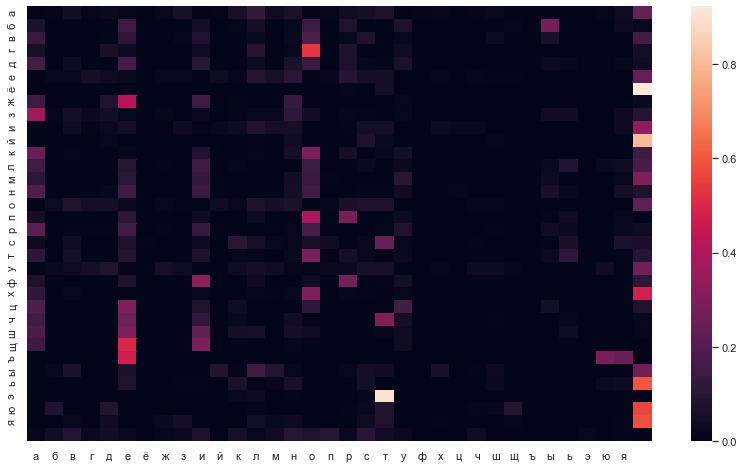

In [259]:
plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

In [260]:
# df

In [261]:
# Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р

In [262]:
res = []
start = 'п'
end = 'р'
prior = 1. / len(RUSSIAN)
for c in RUSSIAN:
    for d in RUSSIAN:
        proba = prior * probabilities[POS[start], POS[c]] * probabilities[POS[c], POS[d]] * probabilities[POS[d], POS[end]]
#         if proba > 0:
#         print(''.join([start, c, d, end]), proba)
        res.append([''.join([start, c, d, end]), proba])

In [263]:
data = pd.DataFrame(res)

In [264]:
data.columns=['word', 'prob']

In [265]:
# data

In [266]:
reg = r'\s' # отсеим слова с пробелами
data['word_1'] = data['word'].str.contains(reg).values.reshape(-1)

In [267]:
data[data['word_1']==False].sort_values('prob', ascending=False).head(25)

,word,prob,word_1
583,прер,0.000120,False
593,прор,0.000091,False
578,прар,0.000074,False
529,потр,0.000042,False
526,попр,0.000041,False
513,погр,0.000038,False
514,подр,0.000038,False
511,побр,0.000029,False
515,поер,0.000026,False
598,прур,0.000015,False


In [268]:
# Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов

In [269]:
def get_letter_and_prob(prev_letter):
    if prev_letter is None:
        for s in list(RUSSIAN):
            yield s, 1.0/len(RUSSIAN)
    else:
        p = POS[prev_letter] 
        prob = probabilities[p]
        for s in list(RUSSIAN):
            sp = POS[s]
            yield s, prob[sp] 

In [270]:
start_1 = 'б'

In [271]:
res_1 = []

In [272]:
# for s1, p1 in get_letter_and_prob(start_1):
#     for s2, p2 in get_letter_and_prob(s1):
#         for s3, p3 in get_letter_and_prob(s2):
#             for s4, p4 in get_letter_and_prob(s3):
#                 for s5, p5 in get_letter_and_prob(s4):
#                     for s6, p6 in get_letter_and_prob(s5):
#                         for s7, p7 in get_letter_and_prob(s6):
#                             prob = p1 * p2 * p3 * p4 * p5 * p6 * p7
#                             if prob > 0:
# #                                 print(start_1+s1+s2+s3+s4+s5+s6+s7, prob)
#                                 res_1.append([start_1+s1+s2+s3+s4+s5+s6+s7, prob])

Код для расчета вероятностей для слова из 8 символов (код в ячейке выше) долго выполняется и требует много памяти, поэтому выполним для 5 букв

In [273]:
for s1, p1 in get_letter_and_prob(start_1):
    for s2, p2 in get_letter_and_prob(s1):
        for s3, p3 in get_letter_and_prob(s2):
            for s4, p4 in get_letter_and_prob(s3):
                for s5, p5 in get_letter_and_prob(s4):
                    prob = p1 * p2 * p3 * p4 * p5
#                     if prob > 0:
#                         print(start_1+s1+s2+s3+s4, prob)
                    res_1.append([start_1+s1+s2+s3+s4+s5, prob])

In [274]:
# len(res_1)

In [275]:
data_1 = pd.DataFrame(res_1)

In [276]:
data_1.columns=['word', 'prob']

In [277]:
reg = r'\s' # отсеим слова с пробелами
data_1['word_1'] = data_1['word'].str.contains(reg).values.reshape(-1)

In [278]:
data_1[data_1['word_1']==False].sort_values('prob', ascending=False).head(30)

,word,prob,word_1
37906513,былого,0.000148,False
38299553,быхого,0.000130,False
37889328,былаза,0.000128,False
37889717,былато,0.000128,False
37889464,былала,0.000127,False
37831917,быйсто,0.000121,False
37907057,былото,0.000119,False
37889473,былали,0.000119,False
37889479,былало,0.000114,False
37889445,былако,0.000107,False


Выберите ряд из предыдущих домашних заданий по временным рядам и оцените его через HMM. Попробуйте “построить” (через среднее каждой компоненты) наивный прогноз ряда.

In [279]:
sales_of_company_x = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("Series/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("Series/daily-total-female-births-in-cal.csv")

In [280]:
from hmmlearn.hmm import GaussianHMM

In [281]:
series = dowjones_closing['Close']

In [282]:
values = series.values.reshape(-1,1)

In [283]:
for n in range(1, 12):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))

1 -894.2620483582104
2 -820.6341453620569
3 -786.8375332667736
4 -752.0201472668955
5 -737.1181111930915
6 -729.5671112589446
7 -713.7233778326264
8 -702.1073061994863
9 -690.983293646809
10 -691.3313489290479
11 -682.0122706600298


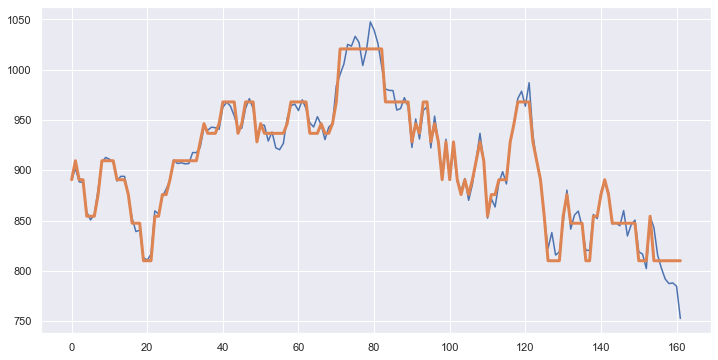

In [284]:
model = GaussianHMM(n_components=11,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)

Не могу понять как прогнозировать новые значения, прошу помочь